In [31]:

# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import ttest_ind

In [33]:
# LOAD DATA

# Load dataset from local path
file_path = 'C:/Users/Rahma/Downloads/avian_raw_dataset.xlsx'
df = pd.read_excel(file_path)

# Initial overview
print(df.head())
print(df.info())
print(df.describe(include='all'))

   Year  Month         Region  Avg Monthly Temp  Humidity  \
0  2020      2  East Midlands               5.4      59.5   
1  2019      7  East Midlands               8.3      66.1   
2  2018      2  East Midlands               9.3      77.3   
3  2021      4  East Midlands              15.5      65.9   
4  2021      5  East Midlands              21.6      52.6   

   Proportion of Age (0-7)  Proportion of Age (Immature)  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.5   
4                      0.0                           1.0   

   Proportion of Age (Adult)  Proportion of Age (Unknown)  \
0                        0.0                          1.0   
1                        1.0                          0.0   
2                        1.0                          0.0   
3                        0.5

In [35]:
# DATA CLEANING & PREPROCESSING


# Replace zero values with NaN assuming zeros may indicate missing data
df.replace(0, np.nan, inplace=True)

# Fill numeric missing values with median (because it robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)

# Optional: Check categorical columns and their unique value counts
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} has {df[col].nunique()} unique values")

# Converting the categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=[col for col in df.columns if df[col].dtype == 'object'], drop_first=True)

Region has 8 unique values


In [37]:
# FEATURE/ TARGET SPLIT

# Target variable
target = 'Number of Diagnosed Cases'
X = df.drop(columns=[target])
y = df[target]

In [41]:
# FEATURE SCALING

# Standardize features to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# DATA SPLITTING

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


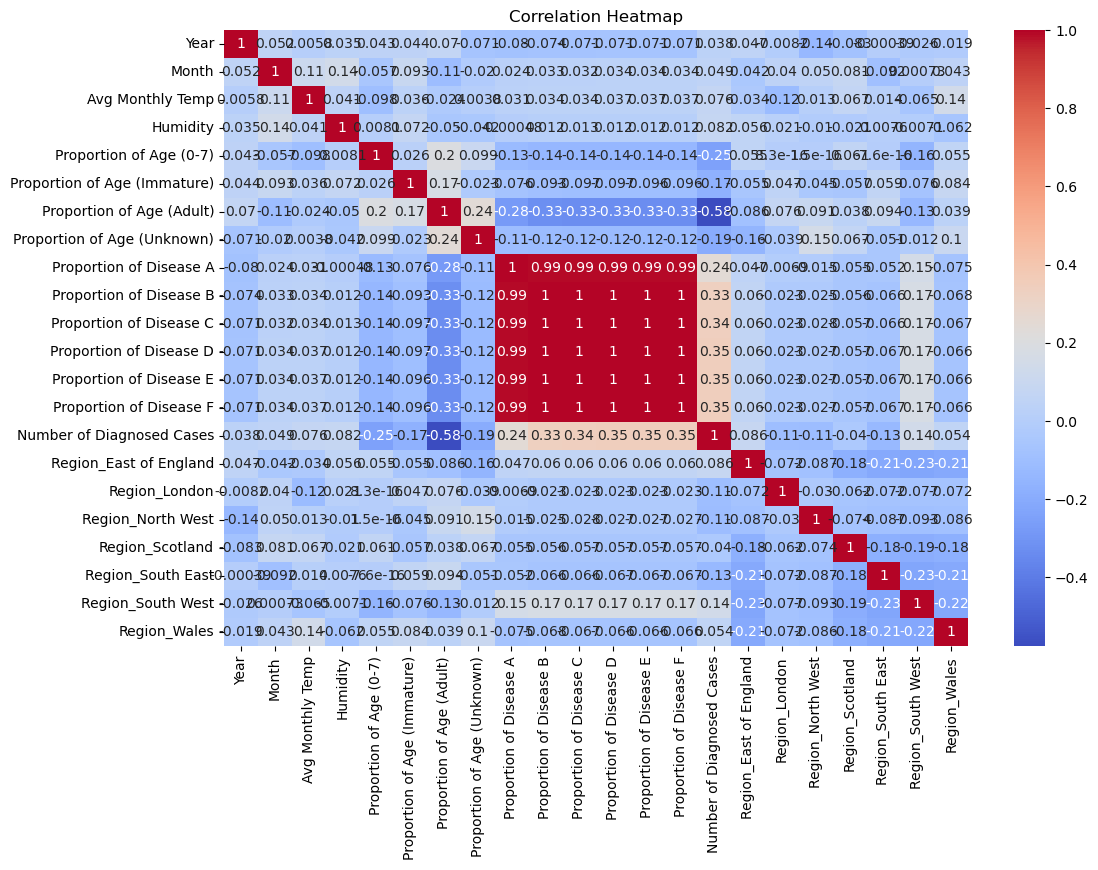

In [15]:
# EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------------------

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

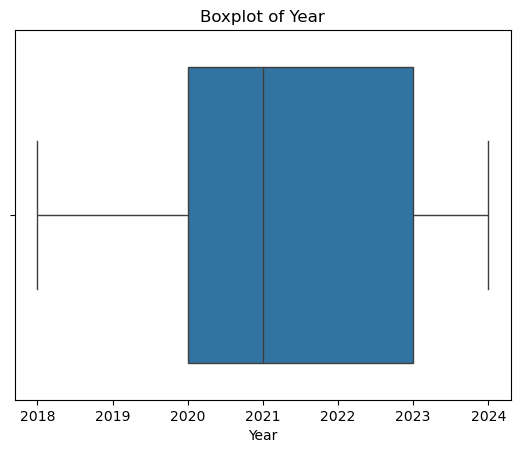

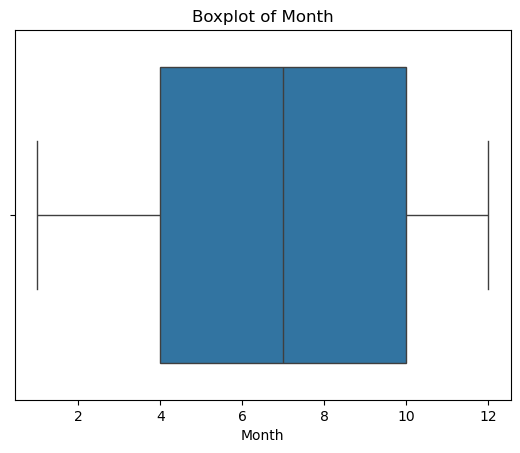

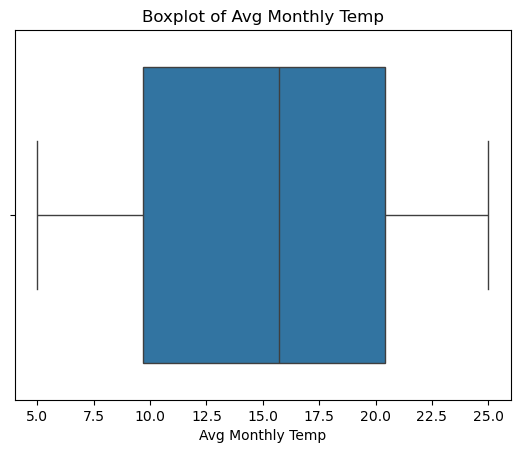

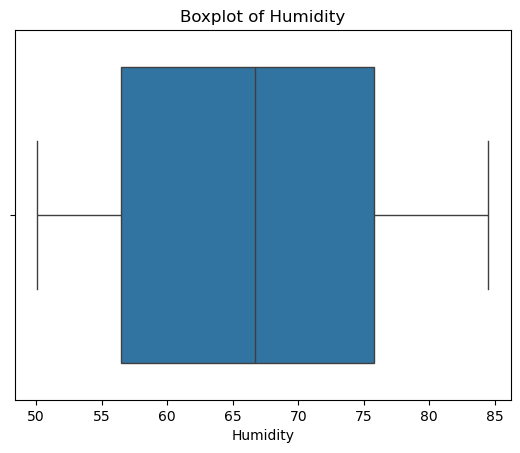

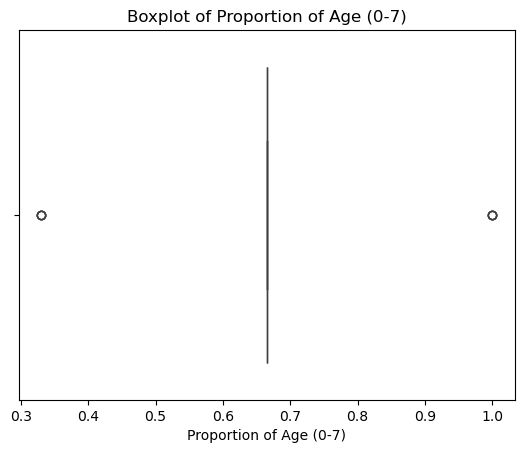

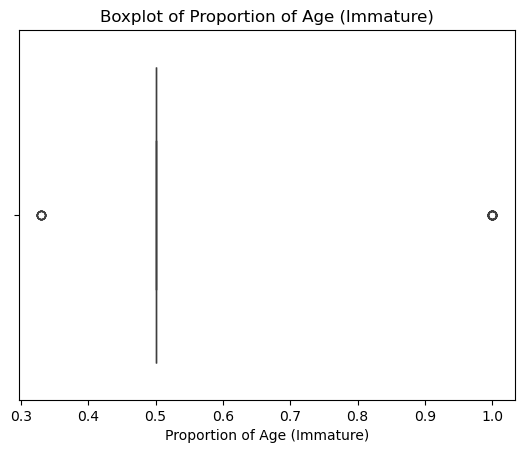

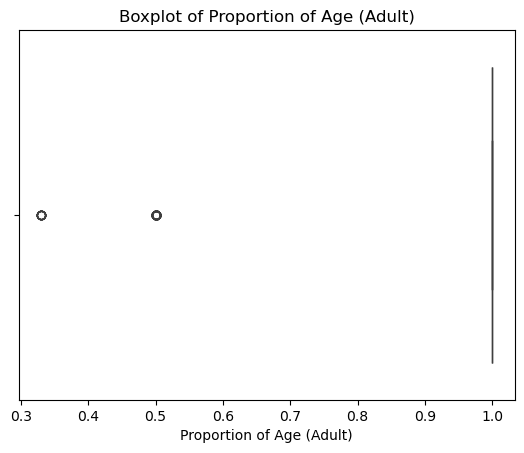

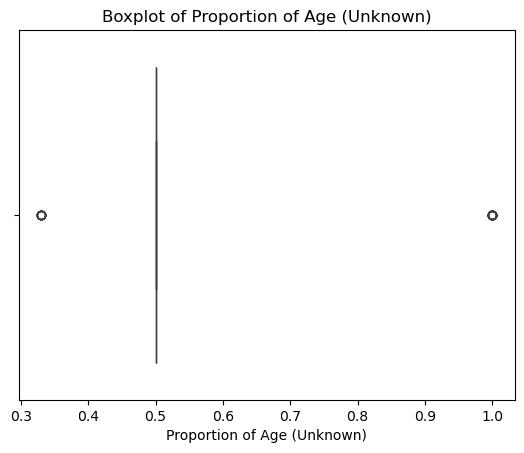

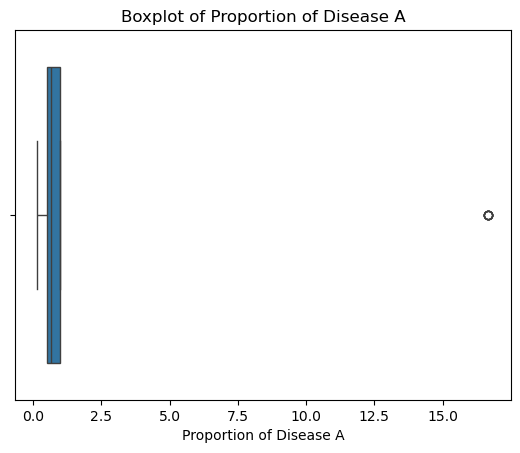

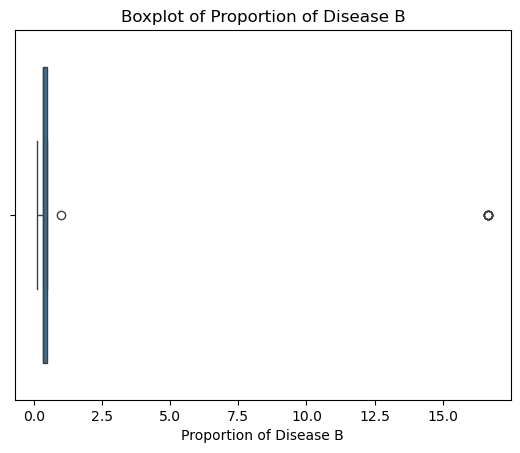

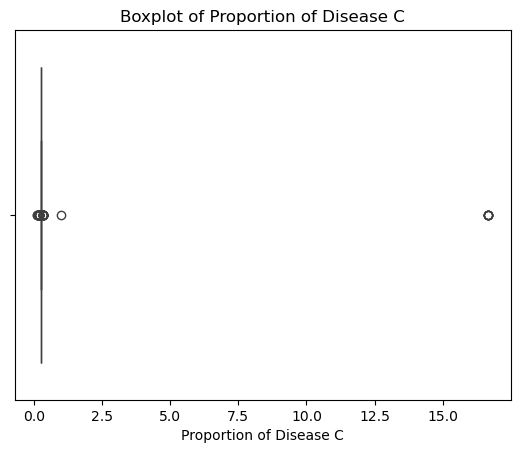

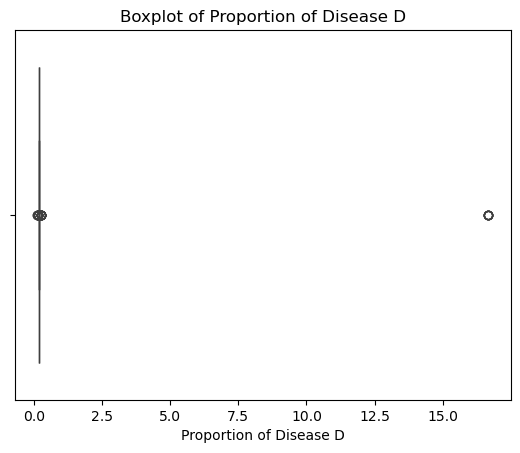

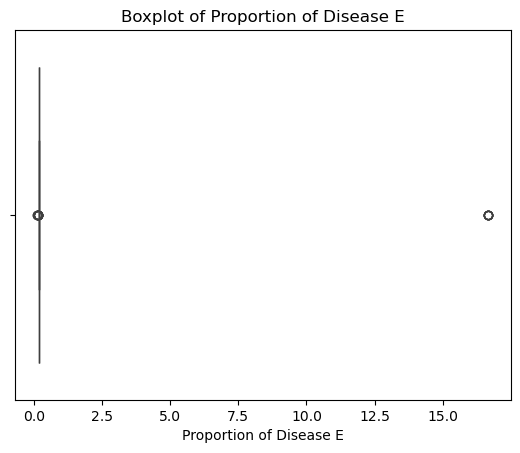

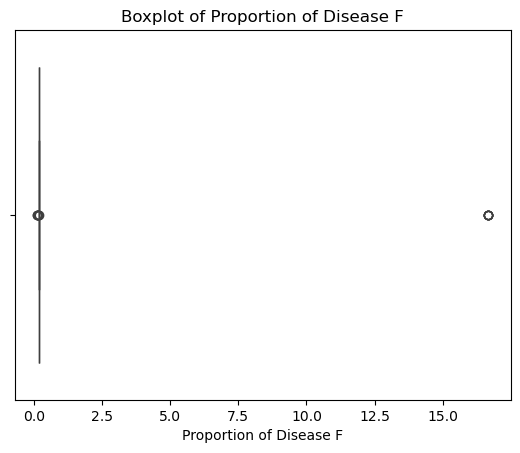

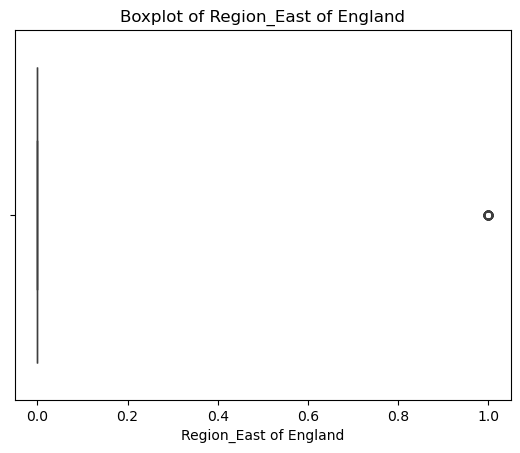

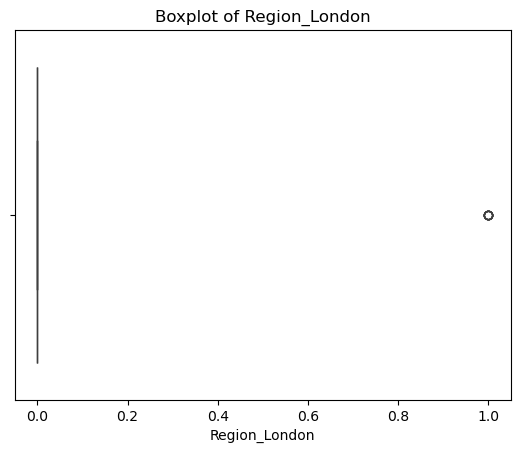

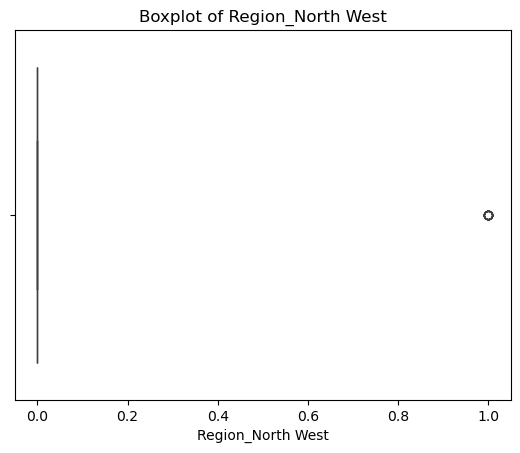

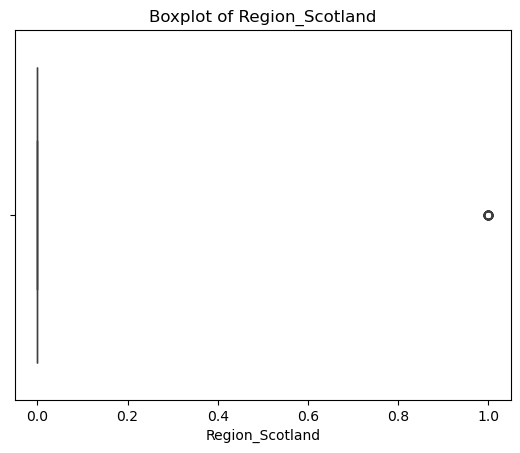

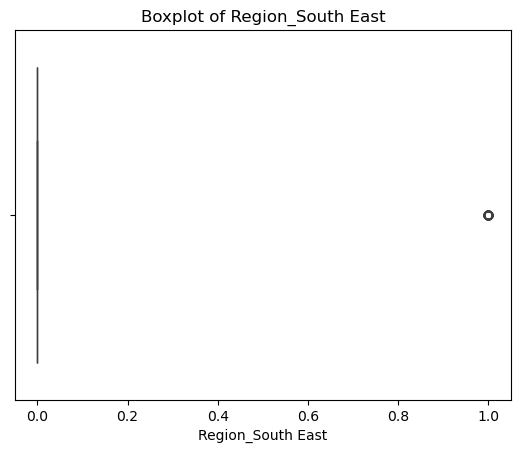

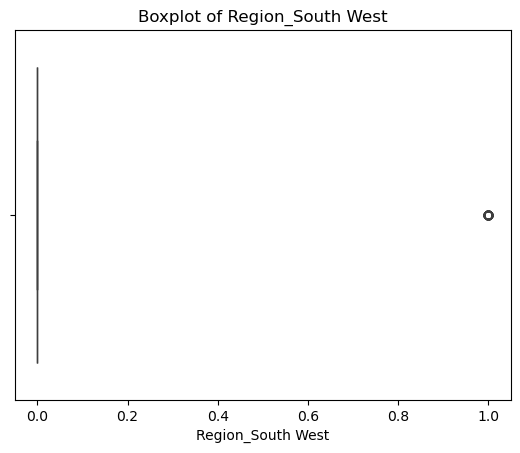

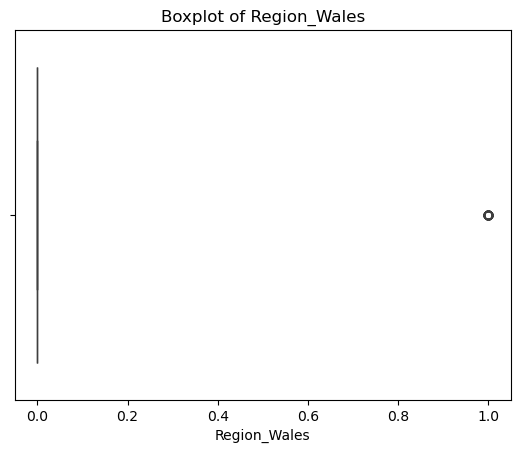

In [45]:
# Boxplots for numeric features (visualize outliers)

for i, col in enumerate(X.columns):
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [47]:
# Linear Regression modeling

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
print(f"Linear Regression R²: {r2_score(y_test, y_pred_lr):.3f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr):.3f}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}")


Linear Regression R²: 0.897
Linear Regression MSE: 0.185
Linear Regression MAE: 0.302


In [49]:
# Random Forest Regreesor modeling

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")


Random Forest R²: 0.985
Random Forest MSE: 0.027
Random Forest MAE: 0.041


In [53]:
# COMPARISON USING STATISTICAL TEST

# T-test for comparing prediction distributions
t_stat, p_value = ttest_ind(y_pred_lr, y_pred_rf)
print(f"T-test p-value (LR vs RF): {p_value:.4f}")

T-test p-value (LR vs RF): 0.8817


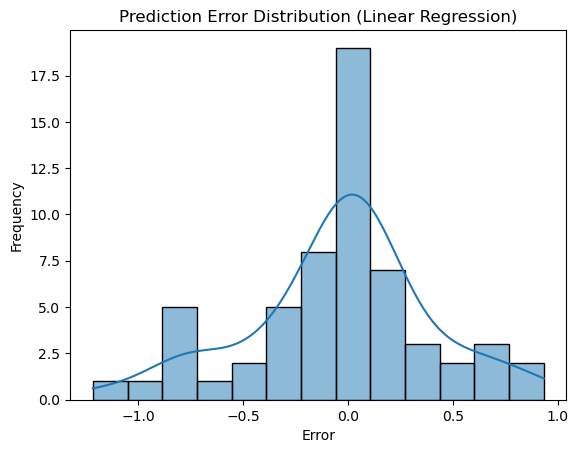

In [55]:
# Distribution of residuals (errors) for Linear Regression

sns.histplot(y_test - y_pred_lr, kde=True)
plt.title("Prediction Error Distribution (Linear Regression)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

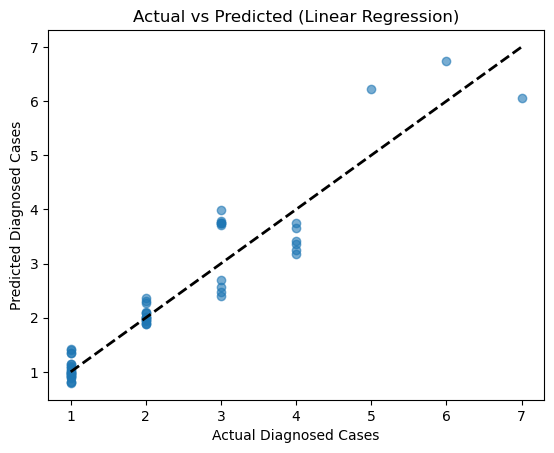

In [57]:
# Actual vs Predicted scatter plot (Linear Regression)

plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Diagnosed Cases")
plt.ylabel("Predicted Diagnosed Cases")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

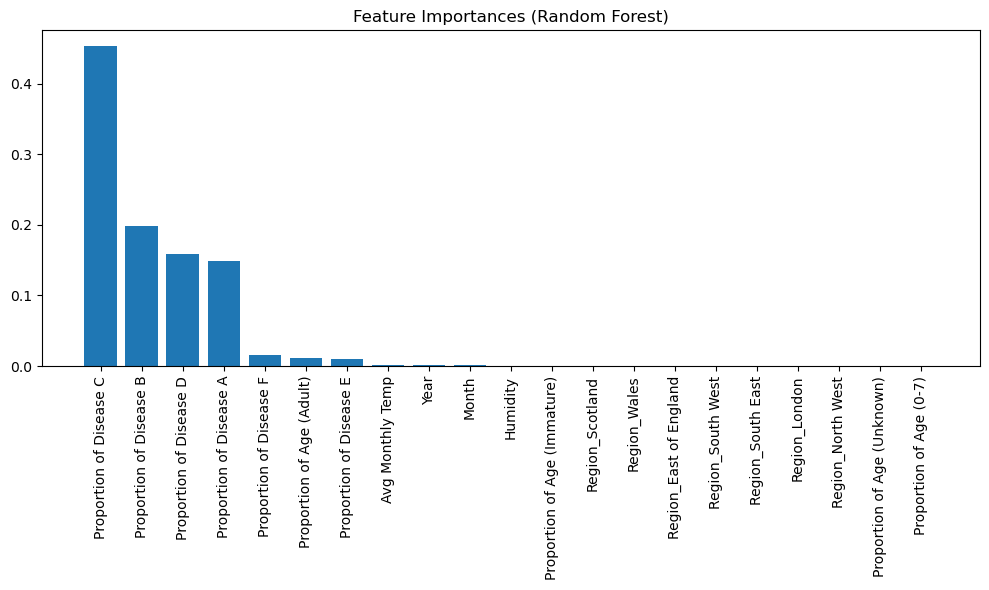

In [29]:
# FEATURE IMPORTANCE FROM RANDOM FOREST
# -----------------------------------------------
# Display feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()